In [20]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv('water_dataX - Sheet1.csv')
dataset.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (痠hos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1443,"ACHENKOIL AT CHENNITHULA, KERALA",KERALA,24.6,5.8,7.4,77,1.4,0.8,285,691,2014
1,3465,"ACHENKOIL AT KALLARAKADAVU, PATHANAMTHITTA",KERALA,25.7,6.6,7.5,75,1.4,0.7,183,448,2014
2,3466,"ACHENKOIL AT PANDALAM (NEAR AYYAPPA TEMPLE), P...",KERALA,24.8,6.7,7.5,82,1.4,1.0,161,443,2014
3,1342,"ACHENKOIL AT THUMPAMON, KERALA",KERALA,25.1,6.7,7.5,85,1.4,1.0,183,420,2014
4,2297,R ANCHARAKANDY AT MERUVAMBA,KERALA,27.3,6.7,6.9,56,0.9,0.2,82,172,2014


In [21]:
#dependent and independent variable
#the independent variables are temperature, dissolved oxygen and pH
#the dependent variable is BOD 
X = dataset.iloc[:, 3:6]
y = dataset.iloc[:, 7]

In [22]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape

(220, 3)

In [24]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 3))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the fourth hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the fifth hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the Training set
model_history=model.fit(X_train, y_train, batch_size = 10,validation_split=0.2, epochs = 100)



Epoch 1/100


c:\python\python38\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


18/18 [==============================] - 1s 13ms/step - loss: 5.9473 - val_loss: 0.9459
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 4.5835 - val_loss: 0.3229
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 3.6882 - val_loss: 0.3331
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 3.3925 - val_loss: 0.2696
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 3.0957 - val_loss: 0.2489
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 2.8670 - val_loss: 0.2288
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 2.7378 - val_loss: 0.2400
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 2.5107 - val_loss: 0.2354
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 2.3403 - val_loss: 0.2438
Epoch 10/100
18/18 [==============================] - 0s 4ms/step - loss: 2.1902 - val_loss: 0.2368
Epoch 11/100
18/18 [

In [25]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


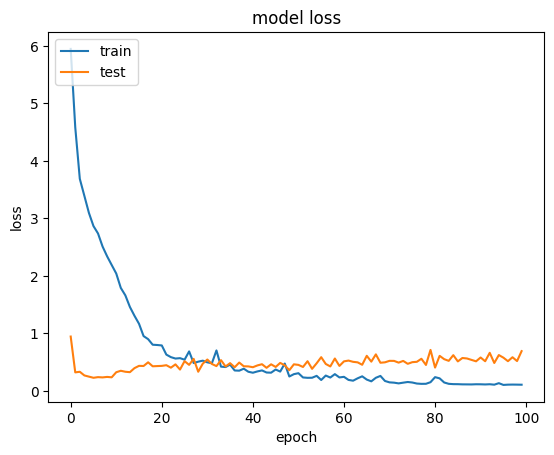

In [26]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



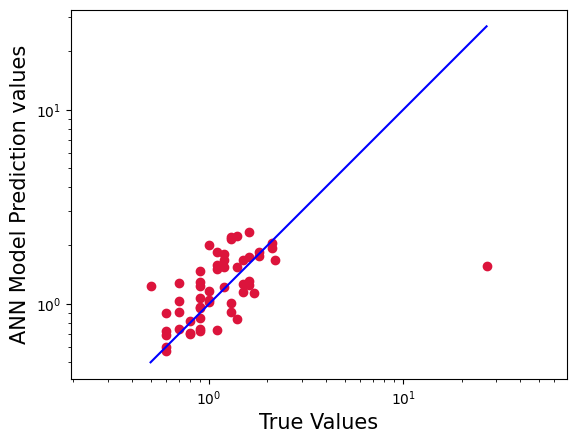

In [31]:

plt.scatter( y_test, y_pred,c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('ANN Model Prediction values', fontsize=15)
plt.axis('equal')
plt.show()

In [32]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.013655677815735623
